<!-- # Svar uppgifter Gradient Decent -->

In [24]:
# 0
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

X = np.random.uniform(low= 0, high=1, size=(1000, 2))
epsilon = np.random.normal(loc= 0, scale=1, size=1000)
y = 3*X[:,0] + 5*X[:,1] + 3 + epsilon
y = y.reshape(-1, 1)

X = np.column_stack([np.ones(X.shape[0]), X])

X.shape, y.shape

((1000, 3), (1000, 1))

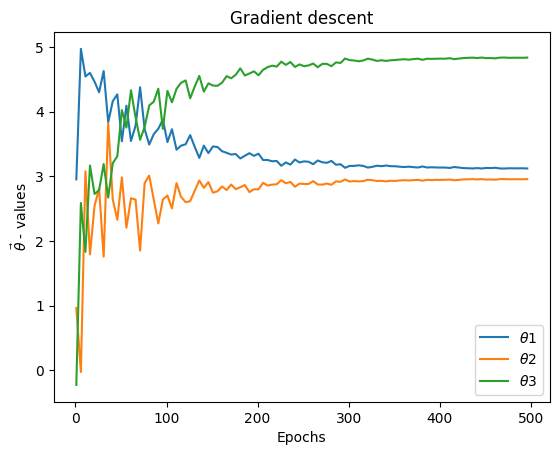

In [25]:
# 1 
# a)

def gradient_descent(X, y, learning_rate=.1, iterations=500):
    
    m = len(X)
    theta = np.random.randn(X.shape[1],1)
    for _ in range(iterations):
        gradiant = (2/m) * X.T @ (X @ theta - y)
        theta -= learning_rate*gradiant

    return theta



#a)


steps = range(1, 501, 5)
thetas = [gradient_descent(X, y, iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)



fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\theta$1", r"$\theta$2", r"$\theta$3"])
# ax.axhline(y=2, color='b', linestyle='--', label="True intercept")
# ax.axhline(y=9, color='orange', linestyle='--', label="True slope")
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()



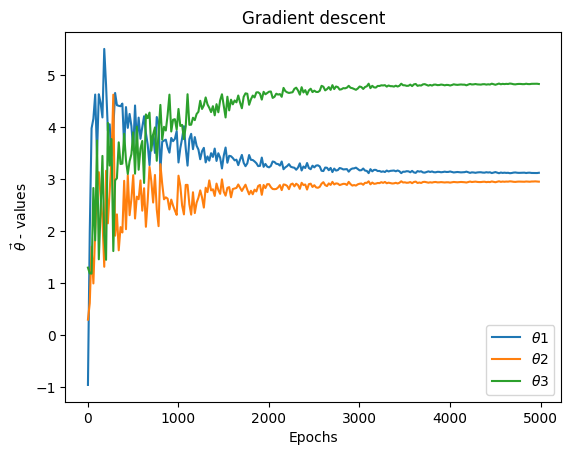

In [26]:
#b)
steps = range(1, 5001, 20)
thetas = [gradient_descent(X, y, iterations = iteration, learning_rate=.01).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas



fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\theta$1", r"$\theta$2", r"$\theta$3"])
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()


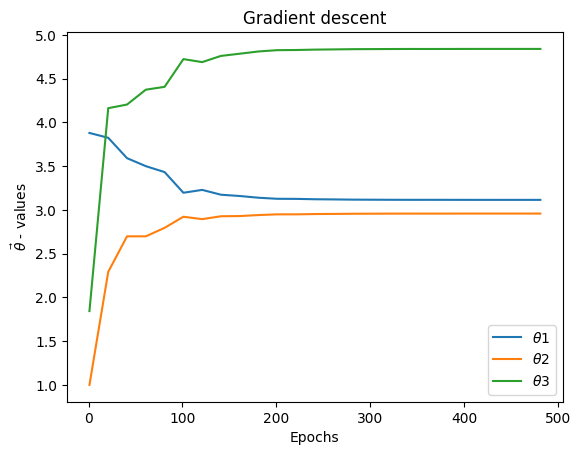

In [27]:
#c)
steps = range(1, 501, 20)
thetas = [gradient_descent(X, y, iterations = iteration, learning_rate=.2).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas



fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\theta$1", r"$\theta$2", r"$\theta$3"])
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()


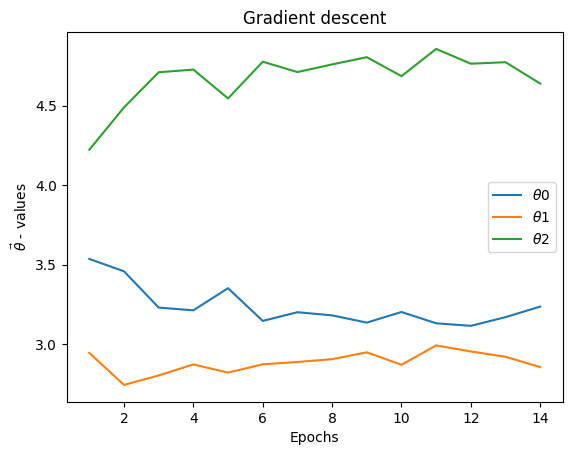

In [28]:
# 2)

t0, t1 = 5, 50
epochs = range(1, 15)
def learning_schedule(t):

    return t0/(t+t1)

def SGD(X, y, epochs = 10):
    
    m = len(X)
    theta = np.random.randn(3, 1)

    for epoch in range(epochs):
        for i in range(m):
            random_i = np.random.randint(m)
            x_i = X[random_i:random_i+1]
            y_i = y[random_i:random_i+1]
            
            gradiant = 2 * x_i.T.dot (x_i.dot (theta) - y_i)
            eta = learning_schedule(epoch*m+i)
            theta -= eta*gradiant
    return theta
thetas = [SGD(X, y, epochs=iteration).reshape(-1) for iteration in epochs]
thetas = np.array(thetas)
thetas.shape[1]

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas, label = [fr"$\theta${i}" for i in range(thetas.shape[1])])
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()

This calculates how many mini-batch updates have occurred since the start of training.
Breaking it down:

    epoch * (m // batch_size):
        Counts how many full mini-batch iterations have been completed in previous epochs.
        m // batch_size is the number of batches per epoch.
    i // batch_size:
        Tracks the current batch within the epoch.

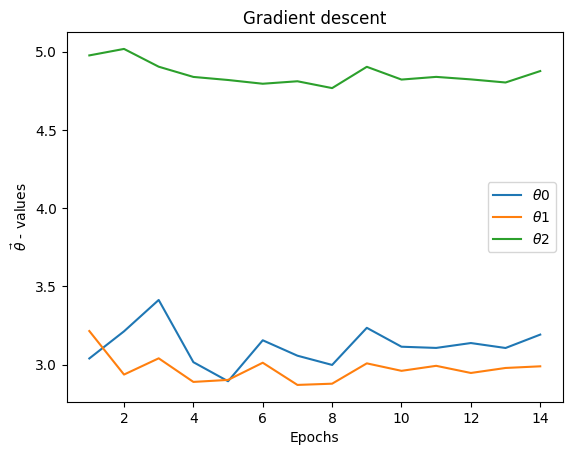

In [29]:
# 3)

t0, t1 = 5, 50
epochs = range(1, 15)
def learning_schedule(t):

    return t0/(t+t1)

def MiniGD(X, y, epochs = 10, batch_size = 16):
    
    m = len(X)
    theta = np.random.randn(3, 1)

    for epoch in range(epochs):
        pick = np.random.permutation(m)
        for i in range(m):

            data_batch = pick[i:batch_size+i]
            x_i = X[data_batch]
            y_i = y[data_batch]
            
            gradient = 2 / batch_size * x_i.T.dot(x_i.dot(theta) - y_i)  #
            eta = learning_schedule(epoch * (m // batch_size) + i // batch_size)
            theta -= eta*gradient
    return theta
thetas = [MiniGD(X, y, epochs=iteration).reshape(-1) for iteration in epochs]
thetas = np.array(thetas)
thetas.shape[1]

fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas, label = [fr"$\theta${i}" for i in range(thetas.shape[1])])
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()